In [13]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("hw6_tips.csv")
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [14]:
df.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [15]:
#Tính tổng bill + tips trong 1 ngày
daily_avg = df.groupby("day")[["total_bill","tip"]].mean().reset_index()
daily_avg

,day,total_bill,tip
0,Fri,17.151579,2.734737
1,Sat,20.441379,2.993103
2,Sun,21.410000,3.255132
3,Thur,17.682742,2.771452


In [16]:
order = ["Thur", "Fri", "Sats", "Sun"]
daily_avg["day"] = pd.Categorical(daily_avg["day"], categories= order, ordered = True)
daily_avg = daily_avg.sort_values("day")

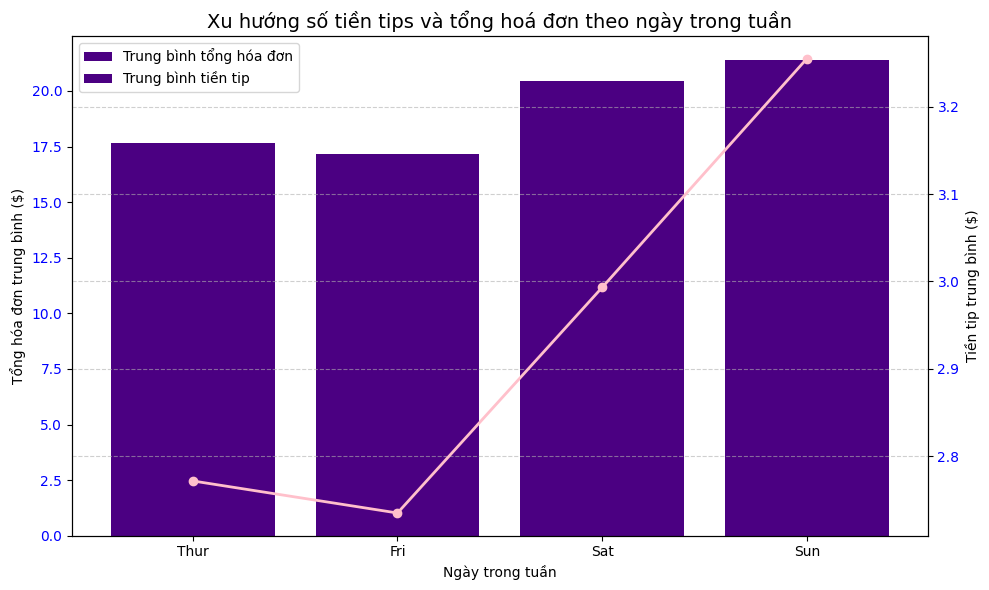

In [17]:
fig, ax1 = plt.subplots(figsize=(10, 6))

# Cột: total bill
bars = ax1.bar(daily_avg["day"], daily_avg["total_bill"], label="Trung bình tổng hóa đơn", color="indigo")

ax1.set_xlabel("Ngày trong tuần")
ax1.set_ylabel("Tổng hóa đơn trung bình ($)")
ax1.tick_params(axis="y", labelcolor="blue")

# line: tip
ax2 = ax1.twinx()
ax2.plot(daily_avg["day"], daily_avg["tip"], color="pink", marker="o", linewidth=2, label="Trung bình tiền tip")
ax2.set_ylabel("Tiền tip trung bình ($)")
ax2.tick_params(axis="y", labelcolor="blue")

# Tiêu đề
plt.title("Xu hướng số tiền tips và tổng hoá đơn theo ngày trong tuần", fontsize=14)

# Chú thích
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines, labels + labels2, loc="upper left")

plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()